In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Importing Dataset

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 58% 95.0M/163M [00:00<00:00, 986MB/s]
100% 163M/163M [00:00<00:00, 761MB/s] 


In [6]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset, 'r') as zip:
   # Extract all the contents of zip file in current directory
   zip.extractall()
   print('Done')

Done


In [7]:
ls

data/  face-mask-dataset.zip  kaggle.json  sample_data/


# Importing Datasets

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [9]:
# saving Dataset of with_mask images and without_mask images
with_mask_file = os.listdir('/content/data/with_mask')
without_mask_file = os.listdir('/content/data/without_mask')

In [10]:
#printing first 5 with_mask files
print(with_mask_file[0:5])

['with_mask_3331.jpg', 'with_mask_553.jpg', 'with_mask_1107.jpg', 'with_mask_1937.jpg', 'with_mask_2939.jpg']


In [11]:
# last 5 entries of without_mask_file
print(with_mask_file[-5:])

['with_mask_3020.jpg', 'with_mask_376.jpg', 'with_mask_3430.jpg', 'with_mask_2510.jpg', 'with_mask_1971.jpg']


In [12]:
print(without_mask_file[0:5])

['without_mask_1504.jpg', 'without_mask_386.jpg', 'without_mask_840.jpg', 'without_mask_1921.jpg', 'without_mask_3305.jpg']


In [13]:
print(without_mask_file[-5:])

['without_mask_3673.jpg', 'without_mask_979.jpg', 'without_mask_2607.jpg', 'without_mask_316.jpg', 'without_mask_2140.jpg']


In [14]:
# Total no of images in both folders
print(f'Total no of with_mask images: {len(with_mask_file)}')
print(f'Total no of without_mask images: {len(without_mask_file)}')

Total no of with_mask images: 3725
Total no of without_mask images: 3828


# Labeling these 2 class of images

If all these images were in the same folder, we would have to read name of each file and the label accordingly: with_mask:1, without_mask:0
But, here since we already have in different folders it won't be necessary

In [15]:
# with_mask --> 1
with_mask_label = [1]*len(with_mask_file)
# without_mask --> 0
without_mask_label = [0]*len(without_mask_file)

In [16]:
print(with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
len(with_mask_label) #just checking

3725

In [18]:
Labels = with_mask_label + without_mask_label # These are list, hence they are combined
print(len(Labels))
print(Labels[0:5])
print(Labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# **Displaying Images**

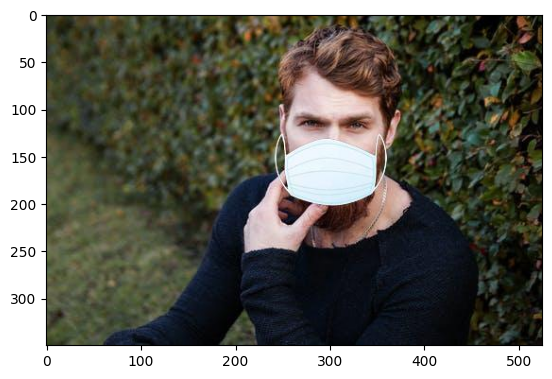

In [19]:
# with mask image
img_with_mask = mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
plt.imshow(img_with_mask)

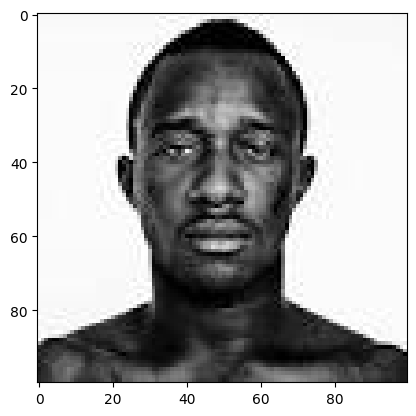

In [20]:
# without mask image
img_without_mask = mpimg.imread('/content/data/without_mask/without_mask_1.jpg')
plt.imshow(img_without_mask)

# **Image Processing**

1. Resize images
2. Convet images to Numpy arrays

In [21]:
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_file:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image.convert('RGB') # some images are B/W
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_file:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image.convert('RGB') # some images are B/W
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
len(data)

7553

In [23]:
type(data[0])

numpy.ndarray

array([[[252, 231, 204],
        [254, 237, 213],
        [255, 246, 228],
        ...,
        [184, 156, 129],
        [183, 158, 132],
        [184, 164, 141]],

       [[252, 232, 205],
        [254, 239, 214],
        [255, 247, 228],
        ...,
        [186, 158, 131],
        [191, 170, 148],
        [225, 214, 199]],

       [[251, 233, 205],
        [254, 241, 215],
        [254, 248, 229],
        ...,
        [201, 185, 165],
        [241, 235, 227],
        [255, 254, 250]],

       ...,

       [[206, 189, 171],
        [201, 184, 168],
        [187, 169, 155],
        ...,
        [188, 178, 169],
        [176, 163, 150],
        [175, 159, 143]],

       [[207, 190, 172],
        [204, 187, 171],
        [195, 177, 162],
        ...,
        [179, 165, 156],
        [165, 152, 140],
        [177, 161, 147]],

       [[207, 190, 172],
        [206, 189, 173],
        [199, 181, 167],
        ...,
        [180, 161, 145],
        [181, 164, 148],
        [182, 164, 149]]], dtype=uint8)
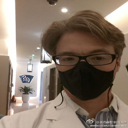

In [24]:
data[0]

In [25]:
data[0].shape

(128, 128, 3)

array([[[254, 221, 173],
        [233, 199, 152],
        [212, 175, 128],
        ...,
        [165, 166, 168],
        [ 87,  85,  83],
        [ 72,  67,  63]],

       [[253, 221, 174],
        [231, 197, 151],
        [207, 171, 125],
        ...,
        [175, 175, 177],
        [ 95,  92,  89],
        [ 70,  64,  60]],

       [[252, 220, 174],
        [228, 194, 148],
        [200, 164, 120],
        ...,
        [176, 175, 177],
        [ 99,  93,  92],
        [ 76,  67,  64]],

       ...,

       [[154, 175, 239],
        [156, 176, 240],
        [161, 174, 238],
        ...,
        [ 95,  99, 115],
        [ 97, 104, 122],
        [ 64,  72,  94]],

       [[154, 175, 237],
        [155, 175, 236],
        [160, 175, 233],
        ...,
        [ 97, 103, 118],
        [ 91,  99, 119],
        [ 49,  61,  86]],

       [[152, 174, 234],
        [155, 175, 234],
        [158, 172, 228],
        ...,
        [ 98, 104, 119],
        [ 77,  87, 106],
        [ 37,  49,  76]]], dtype=uint8)
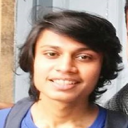

In [26]:
data[4555]

In [27]:
# converting list and labels to numpy array
X = np.array(data)
Y = np.array(Labels)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (7553, 128, 128) + inhomogeneous part.

# Due to above error, we have to remove/modify irregular shape entries

In [28]:
for i, d in enumerate(data):
    if np.shape(d) != (128, 128,3):
        print(f"Irregular shape at index {i}: {np.shape(d)}")

Irregular shape at index 1362: (128, 128, 4)
Irregular shape at index 1435: (128, 128)
Irregular shape at index 1470: (128, 128, 4)
Irregular shape at index 2379: (128, 128, 4)
Irregular shape at index 2749: (128, 128)
Irregular shape at index 3183: (128, 128, 4)
Irregular shape at index 3435: (128, 128, 4)
Irregular shape at index 5694: (128, 128)
Irregular shape at index 6129: (128, 128)


In [29]:
data_fixed = []

for i, d in enumerate(data):
    d = np.array(d)  # Ensure it's a NumPy array

    if d.shape == (128, 128, 3):
        data_fixed.append(d)

    elif d.shape == (128, 128, 4):
        # Drop alpha channel
        data_fixed.append(d[:, :, :3])

    elif d.shape == (128, 128):
        # Convert grayscale to RGB
        rgb = np.stack((d,) * 3, axis=-1)
        data_fixed.append(rgb)

    else:
        print(f"Skipping unfixable item at index {i} with shape {d.shape}")


In [30]:
# converting list and labels to numpy array
X = np.array(data_fixed)
Y = np.array(Labels)

In [31]:
type(X)

numpy.ndarray

In [32]:
type(Y)

numpy.ndarray

In [33]:
print(X.shape) #7553 numpy array, dimensions of arrays
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [68]:
# scaling data
X_train_scaled = X_train/255
X_test_scaled = X_test/255
# It is done to

In [69]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.82352941, 0.85882353, 0.87843137],
        [0.82745098, 0.85490196, 0.87843137],
        [0.83137255, 0

# Building a Neural Network

In [70]:
import tensorflow
import keras
from keras import Sequential,layers

In [71]:
num_of_classes = 2

In [72]:
model = Sequential()

model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_of_classes,activation='sigmoid')) # we have 2 classes, with_mask and without mask

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Val_split =

In [74]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10) #

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.6852 - loss: 0.5806 - val_accuracy: 0.8612 - val_loss: 0.3360
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8839 - loss: 0.2891 - val_accuracy: 0.8860 - val_loss: 0.2902
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9136 - loss: 0.2478 - val_accuracy: 0.8893 - val_loss: 0.2528
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9210 - loss: 0.2004 - val_accuracy: 0.9306 - val_loss: 0.2006
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9321 - loss: 0.1773 - val_accuracy: 0.9355 - val_loss: 0.1861
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9423 - loss: 0.1525 - val_accuracy: 0.9504 - val_loss: 0.1738
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9526 - loss: 0.1271 - val_accuracy: 0.9372 - val_loss: 0.2370
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9517 - loss: 0.1390 - val_acc

# **Model Evaluation**

In [75]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9452 - loss: 0.1547
Loss: 0.16016024351119995
Accuracy: 0.9430840611457825


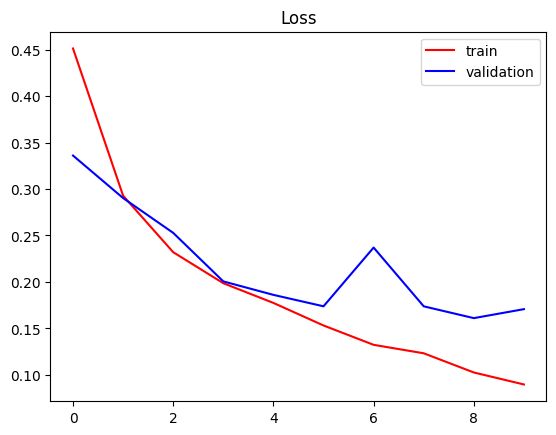

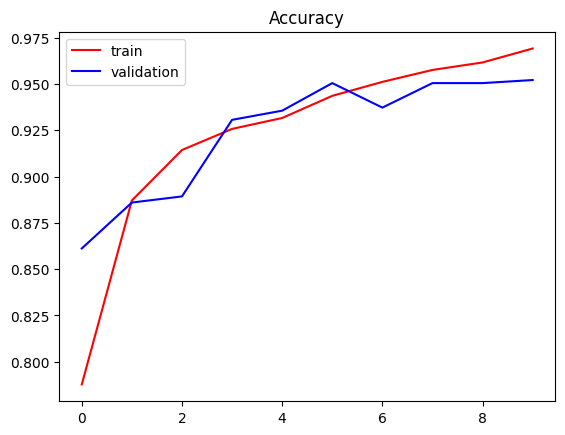

In [76]:
# plotting accuracy and loss

# Loss
plt.title('Loss')
plt.plot(history.history['loss'],color='red',label='train') # traning data loss
plt.plot(history.history['val_loss'],color='blue',label='validation') # validation loss
plt.legend()
plt.show()

# Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'],color='red',label='train') # traning data accuracy
plt.plot(history.history['val_accuracy'],color='blue',label='validation') # validation accuracy
plt.legend()
plt.show()

# Predictive system

Path of image to be predicted: /content/data/with_mask/with_mask_1.jpg


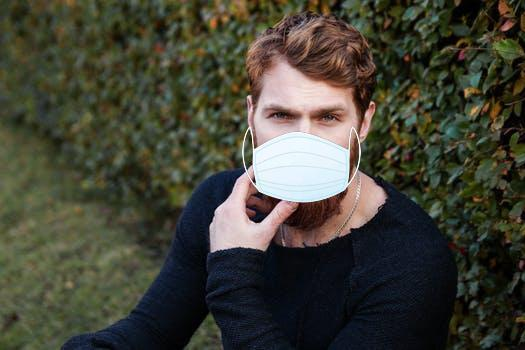

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.14693089 0.9666345 ]]
1
The person in the image is wearing a mask


In [90]:
input_img_path = input('Path of image to be predicted: ')
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)

input_img_resize = cv2.resize(input_img,(128,128))
input_img_scaled = input_img_resize/255
input_img_reshaped = np.reshape(input_img_scaled,[1,128,128,3]) # 1 says we are predicting for 1 data point/image

prediction = model.predict(input_img_reshaped) # probability score
print(prediction)

input_prediction_label = np.argmax(prediction)
print(input_prediction_label)

if(input_prediction_label == 1):
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')